In [1]:
!pip install gymnasium pygame shimmy --quiet


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Sukuriame aplinkƒÖ
env = gym.make("FrozenLake-v1", is_slippery=True)

# Q-lentelƒó
state_size = env.observation_space.n
action_size = env.action_space.n
q_table = np.zeros((state_size, action_size))

# Parametrai
alpha = 0.8
gamma = 0.95
epsilon = 0.1
episodes = 2000

rewards = []

for ep in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        # epsilon-greedy strategija
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Q-lentelƒós atnaujinimas
        q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

        state = next_state
        total_reward += reward

    rewards.append(total_reward)

print("‚úÖ Treniravimas baigtas!")


‚úÖ Treniravimas baigtas!


üéØ Vidutinƒó sƒókmƒó: 0.00


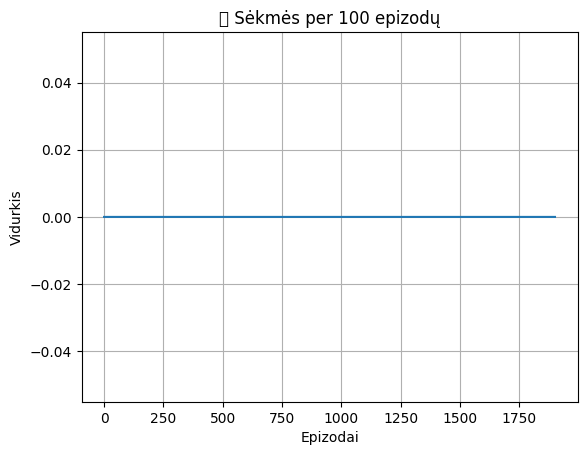

In [4]:
avg_success = np.mean(rewards)
print(f"üéØ Vidutinƒó sƒókmƒó: {avg_success:.2f}")

# Judantis vidurkis
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("üìà Sƒókmƒós per 100 epizod≈≥")
plt.xlabel("Epizodai")
plt.ylabel("Vidurkis")
plt.grid(True)
plt.show()


In [5]:
# Sukuriam aplinkƒÖ su tekstiniu (ANSI) atvaizdavimu
env = gym.make("FrozenLake-v1", render_mode="ansi", is_slippery=True)

state, _ = env.reset()
done = False

print("Apmokytas agentas veikia:")

while not done:
    action = np.argmax(q_table[state])
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

    print(env.render())  # tekstinƒó vizualizacija


Apmokytas agentas veikia:
  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG



S ‚Äì Starto pozicija

F ‚Äì Free (saugus ledo langelis)

H ‚Äì Hole (duobƒó ‚Äì jei ƒØkrenti, pralaimi)

G ‚Äì Goal (tikslas)
Raudonai pa≈æymƒótas langelis (raudonas) ‚Äì agento esama pozicija

(Left) ‚Äì paskutinis agento atliktas veiksmas

SU GRAFINE VIZUALIZACIJA

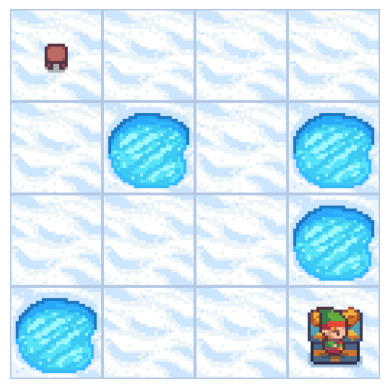

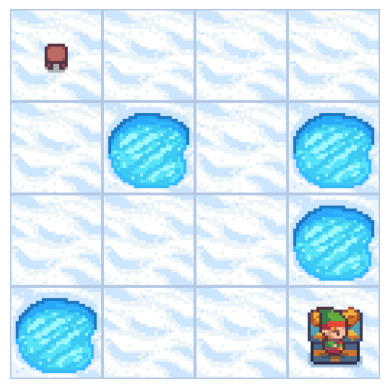

In [6]:
import gymnasium as gym #≈æaidim≈≥ simuliavimo biblioteka
import numpy as np #skaiƒçiavimams su masyvais (Q lentelƒós valdymui)
import matplotlib.pyplot as plt # grafikai, ƒçia naudojamas paveikslƒóliui rodyti
from IPython.display import display, clear_output #leid≈æia atnaujinti paveikslƒólƒØ kiekviename ≈æingsnyje
import time #jeigu norime pauzi≈≥ tarp ≈æingsni≈≥

# Sukuriame aplinkƒÖ
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)

# Inicijuojame apmokytƒÖ (arba tu≈°ƒçiƒÖ) Q lentelƒô
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Paprasta rankinƒó Q lentelƒó (kelias ƒØ ≈æaidimo pabaigƒÖ)
# [de≈°inƒó=2, ≈æemyn=1] ‚Äì pakeiskite kaip norite :)
simple_policy = [2, 2, 1, 1,
                 1, 2, 1, 0,
                 2, 2, 1, 0,
                 2, 2, 2, 0]

# Pradedam
state, _ = env.reset()
done = False

while not done:
    action = simple_policy[state]
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

    # kaip atrodo aplinka+agentas?
    frame = env.render()
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)
    display(plt.gcf())
    time.sleep(0.6)  # Pauzƒós dydis

env.close()


VALIO

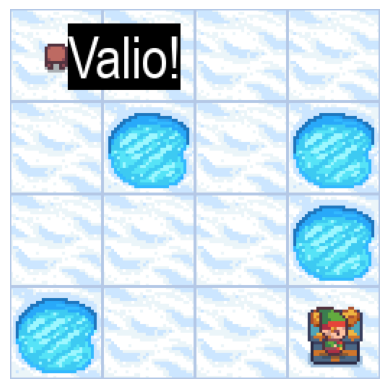

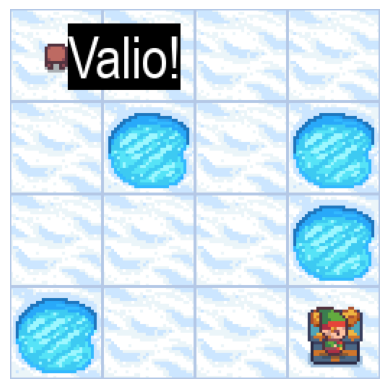

In [7]:
import pygame
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

pygame.init()

env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)

def display_text_on_frame(frame, text, position=(40, 10), font_size=40):
    h, w, _ = frame.shape
    surface = pygame.image.frombuffer(frame.tobytes(), (w, h), 'RGB')
    font = pygame.font.SysFont("Arial", font_size)
    text_surface = font.render(text, True, (255, 255, 255))
    bg_rect = text_surface.get_rect(topleft=position)
    pygame.draw.rect(surface, (0, 0, 0), bg_rect)
    surface.blit(text_surface, position)

    return pygame.surfarray.array3d(surface).transpose(1, 0, 2)

# PAM PA RAAAAAAM
simple_policy = [2, 2, 1, 1,
                 1, 2, 1, 0,
                 2, 2, 1, 0,
                 2, 2, 2, 0]

goal_state = 15
state, _ = env.reset()
done = False

while not done:
    action = simple_policy[state]
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

    frame = env.render()

    if state == goal_state:
        frame = display_text_on_frame(frame, "Valio!", position=(40, 10), font_size=40)

    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)
    display(plt.gcf())
    time.sleep(0.6)

env.close()


SIMBOLIAI

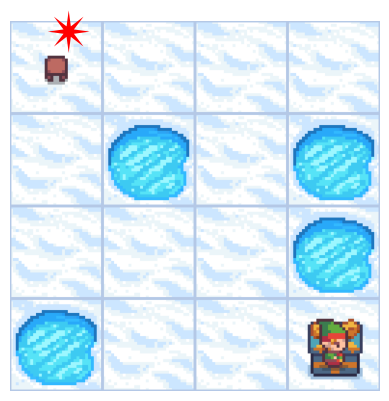

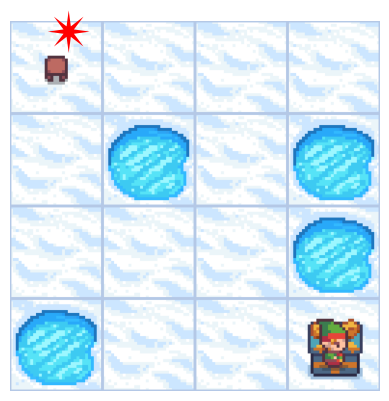

In [8]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Sukuriame aplinkƒÖ
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)

# Paprasta rankinƒó Q lentelƒó (kelias ƒØ ≈æaidimo pabaigƒÖ)
simple_policy = [2, 2, 1, 1,
                 1, 2, 1, 0,
                 2, 2, 1, 0,
                 2, 2, 2, 0]

# Funkcija, kuri rodo ≈°irdelƒós simbolƒØ, kai pasiektas tikslas
def display_heart(frame, position, font_size=40):
    # Paveikslƒólio rodymas su ≈°irdelƒós simboliu
    plt.text(position[0], position[1], '‚ú¥', fontsize=font_size, color='red', ha='center', va='center')

    return frame

# Pradedam
state, _ = env.reset()
done = False

while not done:
    action = simple_policy[state]
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

    # Rodyti aplinkƒÖ
    frame = env.render()

    # Pasiekus tikslƒÖ, rodyti ≈°irdelƒô/betkokius elementus
    if state == 15:  # Tai tikslas (pasiektas tikslas)
        frame = display_heart(frame, (40, 10), 40)  # beeeet tik pasiekus tikslƒÖ

    # Rodyti aplinkƒÖ su simboliu
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)
    display(plt.gcf())

    # Pauzƒó tarp ≈æingsni≈≥, kad b≈´t≈≥ matoma
    time.sleep(0.6)

env.close()


PAKEISKIME AGENTƒÑ FORMOMIS :)

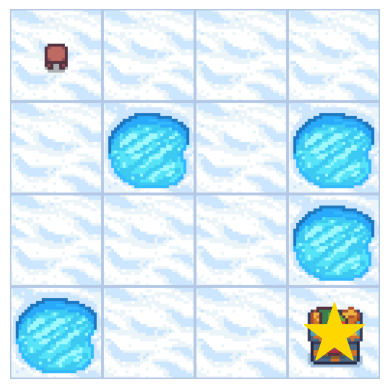

In [9]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# 1. Sukuriam aplinkƒÖ ir politikƒÖ
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)
policy = [2,2,1,1, 1,2,1,0, 2,2,1,0, 2,2,2,0]

# 2. I≈°traukiam ‚Äûraw‚Äú aplinkƒÖ, kad gautume nrow/ncol
unwrapped = env.unwrapped
nrow, ncol = unwrapped.nrow, unwrapped.ncol

state, _ = env.reset()
done = False

while not done:
    # 3. ≈æingsnis, atnaujinam b≈´senƒÖ
    action = policy[state]
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

    # 4. nupie≈°iam backgroundƒÖ
    frame = env.render()
    fig, ax = plt.subplots()
    ax.imshow(frame)
    ax.axis("off")

    # 5. Apskaiƒçiuojam agento koordinatƒô
    h, w, _ = frame.shape
    cell_h, cell_w = h/nrow, w/ncol
    col, row = state % ncol, state // ncol
    x, y = col*cell_w + cell_w/2, row*cell_h + cell_h/2

    # 6. Pie≈°iam agentƒÖ ‚Äì apskritimƒÖ, o jeigu paskutinƒó b≈´senƒó, pie≈°iam ≈ævaig≈ædutƒô
    if state == (nrow*ncol - 1):
        # ≈ævaig≈ædutƒó
        ax.scatter(x, y, s=cell_w*cell_h/2, marker='*', c='gold')
    else:
        # paprastas apskritimas
        circle = plt.Circle((x, y), radius=min(cell_h,cell_w)/3, color='red')
        ax.add_patch(circle)

    # 7. atnaujinam ekranƒÖ
    clear_output(wait=True)
    display(fig)
    plt.close(fig)

    time.sleep(0.5)

env.close()


+ Belmano lygtis


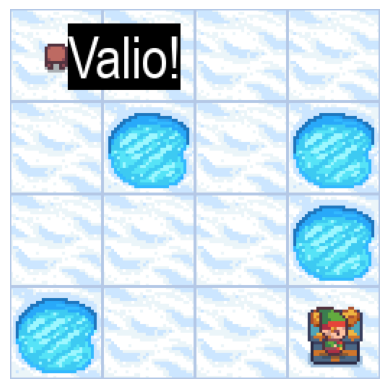

Optimali vertƒó kiekvienai b≈´senai (vertƒós iteracija):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


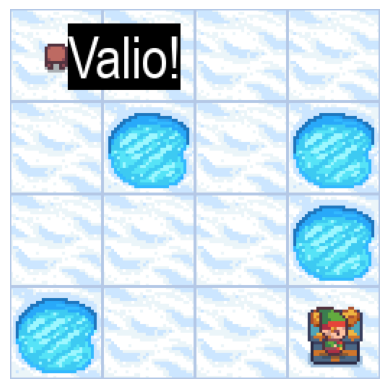

In [10]:
import pygame
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

pygame.init()

env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)

# Funkcija, kuri ƒØterpia tekstƒÖ ƒØ ekrano kadro (frame) paveikslƒólƒØ
def display_text_on_frame(frame, text, position=(40, 10), font_size=40):
    h, w, _ = frame.shape
    surface = pygame.image.frombuffer(frame.tobytes(), (w, h), 'RGB')
    font = pygame.font.SysFont("Arial", font_size)
    text_surface = font.render(text, True, (255, 255, 255))
    bg_rect = text_surface.get_rect(topleft=position)
    pygame.draw.rect(surface, (0, 0, 0), bg_rect)
    surface.blit(text_surface, position)

    return pygame.surfarray.array3d(surface).transpose(1, 0, 2)

# Belmano lygties vertƒós iteracijos metodas
def value_iteration(env, gamma=0.9, theta=1e-4):
    num_actions = env.action_space.n  # Veiksm≈≥ skaiƒçius
    num_states = env.observation_space.n  # B≈´sen≈≥ skaiƒçius

    # Inicializuojame vertes
    V = np.zeros(num_states)

    def update_value_function(V):
        delta = 0
        # Per≈æi≈´rime kiekvienƒÖ b≈´senƒÖ
        for s in range(num_states):
            v = V[s]
            new_value = float('-inf')

            # Apskaiƒçiuojame vertƒô kiekvienam veiksmui
            for a in range(num_actions):
                action_value = 0
                # Norint gauti perƒójimus, atlikite veiksmo simuliacijƒÖ
                for _ in range(100):  # Simuliacija su 100 atsitiktini≈≥ perƒójim≈≥
                    state, _ = env.reset()  # Svarbu atlikti reset kiekvienam veiksmui
                    next_state, reward, terminated, truncated, _ = env.step(a)
                    action_value += reward + gamma * V[next_state]

                new_value = max(new_value, action_value / 100)  # Vidutinƒó vertƒó

            V[s] = new_value
            delta = max(delta, abs(v - V[s]))

        return delta

    iteration = 0
    while True:
        delta = update_value_function(V)
        iteration += 1
        if delta < theta:
            break

    return V

# Apskaiƒçiuojame optimaliƒÖ vertƒô kiekvienai b≈´senai
V = value_iteration(env)

# Naudojame paprastƒÖ politikƒÖ
simple_policy = [2, 2, 1, 1,
                 1, 2, 1, 0,
                 2, 2, 1, 0,
                 2, 2, 2, 0]

goal_state = 15
state, _ = env.reset()  # U≈ætikriname, kad prad≈æioje bus atliktas reset
done = False

while not done:
    # Veiksmas pasirenkamas pagal paprastƒÖ politikƒÖ
    action = simple_policy[state]

    # Atnaujiname b≈´senƒÖ pagal pasirinktas veiksmas
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

    frame = env.render()

    # Patikriname, ar pasiekta tikslo b≈´sena
    if state == goal_state:
        frame = display_text_on_frame(frame, "Valio!", position=(40, 10), font_size=40)

    # Pavaizduojame rƒómelƒØ su vertƒómis
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)
    display(plt.gcf())
    time.sleep(0.6)

env.close()

# Atspausdiname optimaliƒÖ vertƒô kiekvienai b≈´senai
print("Optimali vertƒó kiekvienai b≈´senai (vertƒós iteracija):")
print(V)
